<a href="https://colab.research.google.com/github/MatthewBenning/Statistics-Honours-Research-Project/blob/main/sample_path_sims_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[100, 99.88805849885021, 100.17081633515554, 99.28189564966151, 100.22329717616262, 99.8126464945401, 100.45701837189189, 100.9298221340618, 100.83152177193861, 101.37060068648358, 100.92565181163236, 100.43263747886084, 100.96469335669457, 100.9111894735685, 100.77956115947028, 100.23738629259802, 100.70306556402917, 100.84553616367928, 100.47481632035829, 100.77456222327656, 100.70984062215892, 100.57653901611009, 99.70166140600098, 100.1527781595226, 99.96178431930475, 99.44820066596267, 99.64607687721356, 99.3297238330215, 99.83294220414551, 100.26997130027347, 100.24820295550319, 100.66441053305931, 100.39355331099291, 99.85876850510127, 99.93787279205831, 100.6562019022138, 101.38190589210923, 101.71809242161116, 101.1915442472935, 100.80715897200899, 101.05754019192929, 101.45985967690196, 100.50483736656855, 100.3466459204933, 100.1593451613733, 99.43346444925186, 99.60036272173161, 99.65841407462624, 100.47103108463645, 101.20556977674164, 101.30503976899821, 101.6611106096346

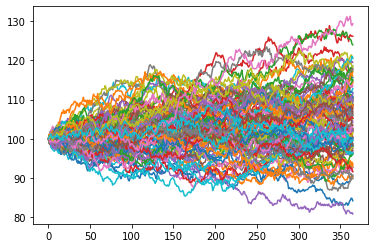

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.888058,99.186117,99.855858,100.369743,98.995439,100.063392,99.757673,99.641202,99.961255,99.507170,99.703285,99.386400,99.344651,99.799826,99.948301,100.338563,100.701215,99.062942,100.607867,99.672410,100.046694,100.747585,100.152673,100.328899,98.963649,100.462555,100.697370,99.987304,100.522545,100.598882,99.083344,99.685492,99.208916,99.168907,100.058006,100.957077,99.435459,100.521353,100.201378,99.101169,...,100.964458,101.204141,99.471059,100.268046,100.177842,99.953691,99.791197,99.536748,99.913070,99.864359,100.265258,99.709906,100.820151,99.861515,100.274251,99.748103,100.662909,99.978399,100.364767,100.046229,99.924899,100.469861,98.984392,99.512315,99.551522,99.680244,99.189012,100.229444,99.852663,100.486397,100.342531,100.534016,100.266137,99.573927,99.564104,99.535745,100.127302,100.169872,100.128716,100.388111
2,100.170816,98.650844,99.473847,101.614084,98.904371,100.304020,99.792766,100.057343,99.453376,99.894284,99.747705,99.369819,99.312646,99.849128,99.392322,99.803727,100.915123,98.863886,100.749317,100.146528,100.085005,101.596380,101.019743,99.789061,98.625980,100.701327,101.309510,100.985855,101.405227,101.713965,99.017563,99.791430,99.947993,99.214532,99.890359,100.348094,99.610867,100.500695,99.819581,99.284962,...,100.148144,100.518897,99.324385,100.665129,100.749269,100.519338,99.528885,99.556952,99.319651,100.022324,100.510204,99.779189,100.342220,100.097782,100.069121,98.602520,100.512341,100.021296,99.948500,100.242637,100.235039,99.783470,99.662308,99.716018,99.214754,99.827765,99.301196,99.967841,99.591537,100.692622,100.404651,100.710616,100.724363,99.827257,99.466906,99.975816,99.158405,100.433691,100.811685,100.802881
3,99.281896,98.180273,99.758491,102.135708,99.457340,100.613376,99.863288,101.003365,100.184906,100.026056,98.924621,99.049213,99.857383,100.303474,99.517908,99.654805,100.878708,99.114815,101.292975,101.689624,100.603936,102.083423,100.886740,99.793023,99.076499,100.818353,100.916043,100.565633,100.810794,101.760364,99.311492,99.456928,99.552462,99.858557,99.819071,100.177083,98.896598,100.849338,100.340195,98.951518,...,99.779410,101.329905,99.861298,100.580878,100.953803,99.874985,100.272861,100.587727,99.772290,100.345749,100.031821,99.599721,100.854767,99.641476,100.408451,99.325375,100.148736,100.184676,100.456426,100.344930,100.783222,99.798505,99.538849,99.530757,98.496256,100.188316,98.902789,100.282379,100.037163,99.525760,100.747279,101.264138,100.592939,99.912026,98.958079,100.359845,99.195361,100.775534,100.323538,101.276772
4,100.223297,98.691311,99.914286,101.882020,99.699203,99.977615,100.109286,100.427107,99.749349,101.035321,98.769249,98.927411,100.252845,99.808251,99.551816,98.748786,100.234839,99.097452,101.538943,101.595994,99.701968,101.568531,100.199256,100.002578,97.604211,100.907032,100.303596,101.201466,100.672151,101.695162,99.530301,99.830005,99.928032,99.703778,99.700253,99.827309,98.281127,101.266339,100.520755,1

In [ ]:
# Author: Matthew Benning
# Statisitcs Honours Research Project
# In this script file, I generate sample paths for an asset using
# a Geometric Brownian Motion. This will be used to train our LSTM.


# Questions - Since these sample paths share the same underlying random incrementation
# they should be cointegrated?


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


# General geometric brownian motion sample paths 

class GeoBrownianMotion:

  def time_step(self):
    # Set up random increment 
    dW = np.random.normal(0,math.sqrt(self.dt))

    # GeoBrownian motion equation
    # dS/s = muDt + sigdW
    dS = self.drift*self.dt*self.current_price + self.vol*self.current_price*dW
    # generate change in asset price 
    self.asset_prices.append(self.current_price+dS)

    self.current_price = self.current_price+dS


  def __init__(self,drift,vol,dt,init_price):
    self.drift = drift
    self.vol = vol
    self.dt = dt

    self.current_price = init_price 
    self.asset_prices =[init_price]

sample_paths = []

# Generate 100 sample paths 
for i in range(0,100):
  sample_paths.append(GeoBrownianMotion(.05,.1,1/365,100))

for j in sample_paths:
  expire = 1
  while ((expire - j.dt)>0):
    j.time_step()
    expire = expire - j.dt

# Find the different asset prices at each point in the sample path 
for i in range(0,100):
  print(sample_paths[i].asset_prices)


# Plot the sample paths
for i in range(0,100): 
  plt.plot(np.arange(0,len(sample_paths[i].asset_prices)),sample_paths[i].asset_prices)
plt.show()

# Save the sample paths of the asset into a csv file
sample_paths_data = pd.DataFrame()

# Just going to convert each sample path into a vector and then append all of them column
# wise so that we have the day and prices for each sample path next to each other 
for i in range(0,100):
  sample_path_holder = pd.DataFrame(sample_paths[i].asset_prices)
  sample_paths_data = pd.concat([sample_paths_data,sample_path_holder],axis=1)
  


sample_paths_data.to_csv('generated_prices.csv')





sample_paths_data











